# 统计图像尺寸、比例分布

同济子豪兄 https://space.bilibili.com/1900783

2022-8-1

## 导入工具包

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 指定数据集路径

In [2]:
# 指定数据集路径
dataset_path = 'fruit81_full'
os.chdir(dataset_path)
os.listdir()

['莲雾',
 '黄桃',
 '圣女果',
 '芒果',
 '菠萝',
 '石榴',
 '桑葚',
 '沃柑',
 '山竹',
 '血橙',
 '人参果',
 '羊角蜜',
 '菠萝莓',
 '猕猴桃',
 '哈密瓜',
 '山楂',
 '黑莓',
 '沙棘',
 '柚子',
 '脐橙',
 '杨桃',
 '甘蔗',
 '车厘子',
 '杨梅',
 '蛇皮果',
 '西柚',
 '百香果',
 '牛油果',
 '无花果',
 '草莓',
 '白兰瓜',
 '椰子',
 '西瓜',
 '蓝莓',
 '桂圆',
 '佛手瓜',
 '葡萄-红',
 '毛丹',
 '酸角',
 '番石榴-红',
 '荔枝',
 '香橼',
 '香蕉',
 '水蜜桃',
 '柠檬',
 '甜瓜-白',
 '胡萝卜',
 '橘子',
 '白心火龙果',
 '梨',
 '蟠桃',
 '甜瓜-伊丽莎白',
 '葡萄-白',
 '杏',
 '砂糖橘',
 '芦柑',
 '樱桃',
 '枣',
 '榴莲',
 '粑粑柑',
 '枇杷',
 '西红柿',
 '甜瓜-金',
 '柿子',
 '菠萝蜜',
 '甜瓜-绿',
 '羊奶果',
 '油桃',
 '树莓',
 '西梅',
 '红心火龙果',
 '沙果',
 '青苹果',
 '番石榴-百',
 '白萝卜',
 '李子',
 '金桔',
 '红苹果',
 '青柠',
 '木瓜',
 '腰果']

In [3]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

100%|██████████| 81/81 [01:35<00:00,  1.17s/it]


In [4]:
df

,类别,文件名,图像宽,图像高
0,莲雾,63.jpg,500.0,281.0
1,莲雾,189.jpg,699.0,442.0
2,莲雾,77.jpg,375.0,500.0
3,莲雾,162.jpg,500.0,500.0
4,莲雾,176.jpg,550.0,324.0
...,...,...,...,...
14428,腰果,147.jpg,500.0,372.0
14429,腰果,52.jpg,500.0,500.0
14430,腰果,46.jpg,500.0,500.0
14431,腰果,190.jpg,600.0,400.0


## 可视化图像尺寸分布

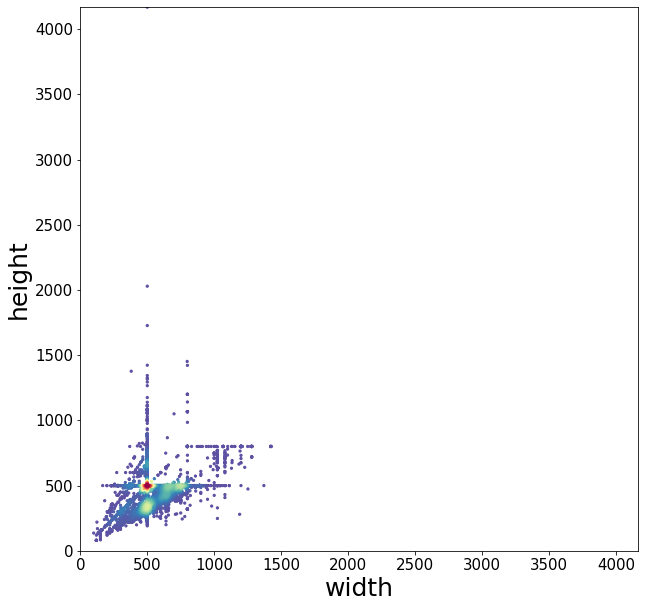

In [7]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()